# Phase estimation

This notebook is  based on [this](https://www.ryanlarose.com/uploads/1/1/5/8/115879647/quic03-phase-estimation.pdf) set of notes, which was written by Ryan LaRose.
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

The phase estimation algorithm is used to determine the eigenvalues of a unitary operator. Computing eigenvalues has an enormous number of applications in an enormous number of fields. As such, the phase estimation algorithm is used in a large number of other quantum algorithms from solving linear systems of equations in linear algebra (search for the HHL algorithm) to minimizing the number of features required in machine learning applications (search for quantum principal component analysis).

### What is "phase estimation"?
Lets introduce some background notation first. We’re concerned with an eigenvalue problem, namely an equation of the form

$$A \mathbf{x} = \lambda \mathbf{x}$$
where $A \in \mathbb{C}^{2^m \times 2^m}$, $\mathbf{x} \in \mathbb{C}^{2^m}$ and $\lambda \in \mathbb{C}$.
Note that we write the dimension as $2^m$ for convenience, since $m$ qubits imply a state space of size $2^m$ as we have previously seen. 
In the quantum case, we’re only going to be concerned with unitary operators, which we normally write as $U$. Since these operators satisfy $U^{\dagger}U = I$, any eigenvalue has magnitude one. Since $\mid \lambda \mid = 1$, we can write it without loss of generality as 

$$\lambda = e^{2 \pi i \phi}$$
where $0 ≤ \phi ≤ 1$ is called the *phase*. Hence the term “phase” in “phase estimation.” The term “estimation” comes about not from the fact that quantum computation is probabilistic, but rather in the degree of precision that we are going to compute, or estimate, the phase to. The most general case of phase estimation is when the phase cannot be written exactly using $n$ bits of precision. In this lecture, we’ll only cover the case where $\phi$ can be written exactly using $n$ bits.

Before we going about estimating the phase, let’s introduce some useful notation that is common in quantum algorithms. The phase $\phi$ is going to be between zero and one, so we can write it as a decimal in binary notation as follows:

$$\phi=0.\phi_1\phi_2 \cdot \cdot \cdot \phi_n$$

where each $\phi_i$ is either zero or one. What does this mean exactly? The same thing we mean when we always write decimals, except here we’re using binary notation.

---

*Definition*. The expression $\phi=0.\phi_1\phi_2 \cdot \cdot \cdot \phi_n$ is equivalent to

$$\phi=0.\phi_1\phi_2 \cdot \cdot \cdot \phi_n \iff \phi = \sum_{k=1}^{n} \phi_k 2^{-k}$$.

*Example 1: some numbers as binary decimals*.
The number 0.5 in decimal is 0.1 in binary, since $0.1 ≡ (1) · 2^{−1} = 1/2 = 0.5$. Note that 0.1 is the same as 0.100000....
 The number 0.75 in decimal is 0.11 in binary, since $0.11 ≡ (1)·2^{−1} +1·2^{−2} = 1/2+1/4 = 3/4 = 0.75$.

### Action of Controlling an Operator on its Eigenstate

The key to understanding the phase estimation algorithm is what happens in the following circuit. 

<img src="Image/fig1.png" align="middle">

Here we let $U$ be a unitary operator and $\bra{\psi}$ an eigenstate with eigenvalue $\lambda = e^{2 \pi i 0.\phi_1}$. We first perform
a Hadamard gate on the first qubit to get the state

$$\ket{+} \otimes \ket{\psi} = \ket{0}\ket{\psi} + \ket{1}\ket{\psi}$$
where we have intentionally omitted the normalization factor of $1/\sqrt{2}$ for clarity. We then perform a controlled $U$ operation, which we have written as $U^{2^0}$ for reasons that will become clear shortly. The action of this gate is to produce the new state

$$\ket{0}\ket{\psi} + \ket{1}U\ket{\psi} = \ket{0}\ket{\psi} + e^{2 \pi i 0.\phi_1}\ket{1}\ket{\psi} = \Big (\ket{0} + e^{2 \pi i 0.\phi_1}\ket{1} \Big ) \otimes \ket{\psi}$$

Note what happened: The second qubit register containing $\ket{\psi}$ hasn’t changed. We shouldn’t expect it to, since $\ket{\psi}$ is an eigenstate of $U$. Thus, no matter how many times we apply $U$ to this register, nothing happens to $\ket{\psi}$.

That’s rather odd though—what’s the point of applying $U$ then? The effect was that it *wrote* some information about the eigenvalue into the relative phase of the first qubit. Namely, the entire effect was to map

$$\ket{0} + \ket{1} \to \ket{0} + e^{2 \pi i 0.\phi_1}\ket{1}$$

How can we read out this information from the quantum state? Consider the effect of applying another Hadamard transformation on the first qubit, which will produce

$$H(\ket{0} + e^{2 \pi i 0.\phi_1}\ket{1}) = (1 + e^{2 \pi i 0.\phi_1})\ket{0} + (1 - e^{2 \pi i 0.\phi_1})\ket{1}$$
where we have again ignored the normalization factor of 1/2.

Now, $\phi_1$ can only be zero or one. In the case that $\phi_1 = 0$, $e^{2 \pi i 0. \phi_1} = 1$, hence the state is exactly $\ket{0}$. Thus, we measure with certainty (i.e., not probabilistically) a state that tells us exactly what the phase, and hence the eigenvalue, is.

---

*Example 2: Phase estimation on Pauli-$X$*.

First, prove that the eigenvalues of $X$ are −1 and 1 with eigenvectors $\ket{-}$ and $\ket{+}$ respectively.
Now, let’s see how we can do this using the phase estimation algorithm. The first thing we need to do is prepare an eigenstate, which we can do by performing the Hadamard gate on the $\ket{0}$ state in the second register to get the plus state. Then, we control on the first qubit in uniform superposition to implement a controlled-$X$ gate, otherwise known as CNOT. Finally, we implement $H$ again on the top qubit, then measure. The complete circuit for this state is shown in in the following circuit.

<img src="Image/fig2.png" align="middle">

$$\ket{0} \otimes \ket{0} \xrightarrow{H \otimes H} \ket{+} \otimes \ket{+}$$
$$\ket{+} \otimes \ket{+} \xrightarrow{CX} \ket{00} + \ket{01} + \ket{10} + \ket{11}$$
$$\ket{00} + \ket{01} + \ket{10} + \ket{11} \xrightarrow{H \otimes I} \ket{0} \otimes \ket{+}$$

Note that this state remains unchanged under the CNOT. After performing the second Hadamard on the top qubit, the top qubit is in the state $\ket{0}$. Hence, measurement always returns the outcome $\phi_1 = 0$, and so we conclude that the corresponding eigenvalue is $\lambda = e^{2\pi i \cdot 0} = 1$, as we must.

---

### Controlling Higher Powers

The key idea of the phase estimation algorithm is to keep applying the same controlled-$U$ operations, but at successively higher powers of two. The final algorithm introduces $n$ qubits in the top register and implements $C(U^{2^k})$ between the kth qubit and the bottom register. Let’s build up to this with one more example where $n = 2$.

The complete circuit for the $n = 2$ case is shown below. (Note that, although we’re only writing one wire for the bottom register, this really consists of $m$ qubits. That is, $\ket{\psi}$ is an $m$-qubit state and $U$ is an $m$-qubit unitary.)

<img src="Image/fig3.png" align="middle">

We’ve already computed what the first control does to the top register. The wavefunction at this point in the circuit is

$$\Big ( \ket{0} + e^{2 \pi i 0.\phi_1 \phi_2} \ket{1} \Big ) \otimes \Big( \ket{0} + \ket{1} \Big ) \otimes \ket{\psi}$$
Note that the relative phase in the first qubit now has two digits because we assumed that $\phi=0.\phi_1\phi_2$ consists of two digits.

The same exact operation now happens on the second qubit, except for one key difference: the power of $U$. In particular, $U$ is now squared. What effect does this have? (answer: $U^2 \ket{\psi} = e^{2 \pi i (2\phi)} \ket{\psi}$).

Note an interesing thing:

$$2 \phi = 2 \cdot 0.\phi_1\phi_2 = 2(\phi_1 2^{-1} + \phi_2 2^{-2}) = \phi_1 + 2 \phi_2 2^{-1} = \phi_1.\phi_2$$
The effect is that the decimal moves one place to the right. (This should not be too surprising based on common arithmetic in base ten.) What’s interesting and convenient, however, is what happens in the exponent:

$$e^{2 \pi i (2 \phi)} = e^{2 \pi i (\phi_1 + 0.\phi_2)} = e^{2 \pi i \phi_1} e^{2 \pi i 0.\phi_2} = e^{2 \pi i 0.\phi_2}$$

The last equality follows because $\phi_1$ is an integer and so the exponential is unity, in general:
$$
e^{2 \pi i (2^k \phi)} = e^{2 \pi i 0.\phi_k\phi_{k+1}...}
$$

Thus, we have proven that the state after applying the $C(U^2)$ to the wavefunction is

$$\Big ( \ket{0} + e^{2 \pi i 0.\phi_1 \phi_2} \ket{1} \Big ) \otimes \Big( \ket{0} + e^{2 \pi i 0.\phi_2} \ket{1} \Big ) \otimes \ket{\psi} (*)$$

How do we read out this information? This time it’s not so easy as a simple Hadamard transform. The missing ingredient is **the quantum Fourier transform**. In particular, the key fact that we’ll be using is the following:

---

*Definition*. (Quantum Fourier transform action) The quantum Fourier transform is a unitary change of basis with the following effect:

$$QFT \Big ( \ket{\phi_1}\ket{\phi_2}\cdot\cdot\cdot\ket{\phi_n} \Big ) = 2^{-n/2} \Big ( \ket{0} + e^{2 \pi i0.\phi_1} \ket{1} \Big ) \otimes \Big ( \ket{0} + e^{2 \pi i0.\phi_1 \phi_2} \ket{1} \Big )\otimes \cdot\cdot\cdot \otimes \Big ( \ket{0} + e^{2 \pi i0.\phi_1\phi_2...\phi_n} \ket{1} \Big )$$

---

The state on the right looks exactly like what we end up with from phase estimation! (Except with the order of the bits reversed, but this is not problem.) So, what we need to apply then to read out the information is the inverse Fourier transform QFT$^{\dagger}$. (The QFT is unitary, as every quantum algorithm must be, therefore it has an inverse).

Thus, if we apply QFT$^{\dagger}$ to the state in (\*), we get a product state containing the information we want about the phase:

$$QFT^{\dagger} \Big ( \ket{0} + e^{2 \pi i 0.\phi_1\phi_2} \ket{1} \Big ) \otimes \Big ( \ket{0} + e^{2 \pi i 0.\phi_2} \ket{1} \Big ) \otimes \ket{\psi} = \ket{\phi_2}\otimes\ket{\phi_1}\otimes\ket{\psi}$$

### General Phase Estimation Algorithm

We now present the general $n$-qubit case for the phase estimation algorithm. The circuit follows immediately from our work in the previous two sections:

<img src="Image/fig4.png" align="middle">

The general calculation is also an immediate generalization of our previous work. Namely, the action of the circuit, ignoring the $\ket{\psi}$ register that never changes, is

$$\ket{0}^{\otimes n} \mapsto $$

(after the Hadamards)
$$ \mapsto \frac{1}{2^{n/2}} \Big ( \ket{0} + \ket{1} \Big ) \otimes \Big ( \ket{0} + \ket{1} \Big ) \otimes \cdot\cdot\cdot \otimes \Big ( \ket{0} + \ket{1} \Big )$$

(after the $C(U)$'s)
$$ \mapsto \frac{1}{2^{n/2}} \Big ( \ket{0} + e^{2 \pi i 0.\phi_1\phi_2...\phi_n}\ket{1} \Big ) \otimes \Big ( \ket{0} + e^{2 \pi i 0.\phi_2\phi_3...\phi_n} \ket{1} \Big ) \otimes \cdot\cdot\cdot \otimes \Big ( \ket{0} + e^{2 \pi i 0.\phi_n} \ket{1} \Big )$$

(after the QFT$^{\dagger}$)
$$\mapsto \ket{\phi_n} \otimes \ket{\phi_{n-1}} \otimes \cdot\cdot\cdot \otimes \ket{\phi_1}$$

By measuring the final state, we obtain a description of the phase, and hence the eigenvalue, exactly.

## Qiskit Implementation 1

Consider a 3-qubit quantum phase estimation of a one-qubit state $\ket{\psi}$.
For this example, let us take the unitary matrix to be $Z$. Then, the input state $\ket{1}$ is an eigenvector with eigenvalue  $−1 = e^{2 \pi i \times 0.5}$. Hence, $\phi =$ 0.5 in decimals or 0.1 in binary. If we use 2 ancilla qubits we should expect the final state of the ancilla qubits to be $\ket{10}$. 

Note that in this case, the controlled unitary gates are $U^{2^{n-1}} = Z^2 = I$ and $U^{2^0} = Z$

Now we will implement the above example in Qiskit. Let's first prepare our environment.

In [21]:

#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

# importing Qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler

sampler = Sampler()

We apply quantum inverse Fourier transformation to write the phase to the ancilla register. We will use exactly the code that we wrote to do a QFT and adapt it to be that of QFT$^{\dagger}$.

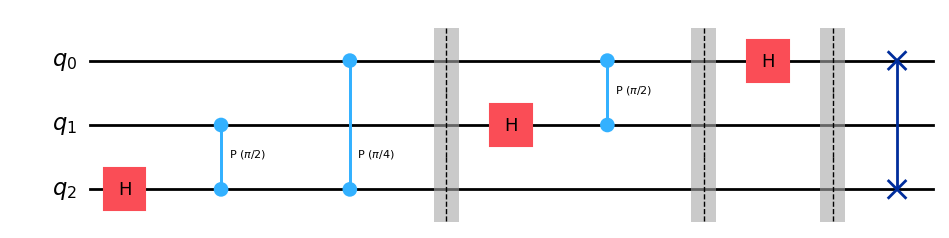

In [22]:
def qft(n):
    q = QuantumRegister(n, name='q')
    qc = QuantumCircuit(q, name='QFT')
    # QFT with n qubits
    # First we apply hadamard and control phase gates
    for j in range(n-1,-1,-1):
        qc.h(q[j])
        for k in range(j):
            qc.cp(math.pi/2**(k+1), q[j-1-k], q[j])
        qc.barrier()
    # Now finish the QFT by reversing the order of the qubits
    for j in range(n//2):
        qc.swap(q[j], q[n-j-1])
        
    return qc

qft(3).draw('mpl')

def qft_dagger(n):
    q = QuantumRegister(n)
    circ = QuantumCircuit(q, name="qft dag")
    """n-qubit QFT dagger on q in circ."""
    for qubit in range(n // 2):
        circ.swap(qubit, n - qubit - 1)
    
    for j in range(n):
        for k in range(j):
            circ.cp(-math.pi/float(2**(j-k)), q[k], q[j])
        circ.h(q[j])
        circ.barrier()
    
    return circ

qft_dagger(3).draw('mpl')

# QFT dag without swap
def qft_dagger_wo_swap(n):
    q = QuantumRegister(n)
    circ = QuantumCircuit(q, name="qft dag")
    
    for j in range(n):
        for k in range(j):
            circ.cp(-math.pi/float(2**(j-k)), q[k], q[j])
        circ.h(q[j])
        circ.barrier()
    
    return circ


def cu(n):
    circ = QuantumCircuit(1, name="u^" + str(n))
    for i in range(n):
        circ.z(0)
    ctrl_u = circ.to_gate().control(1)
    
    return ctrl_u

Now, set up the quantum circuit. We will use three qubits -- qubits 0 and 1 as ancilla, and qubit 2 as the eigenstate of the unitary operator.
We initialize $\ket{\psi} = 1$ by applying an $X$ gate.

In this case we use the QFT inv, without the swap part, to read the input in the proper order.

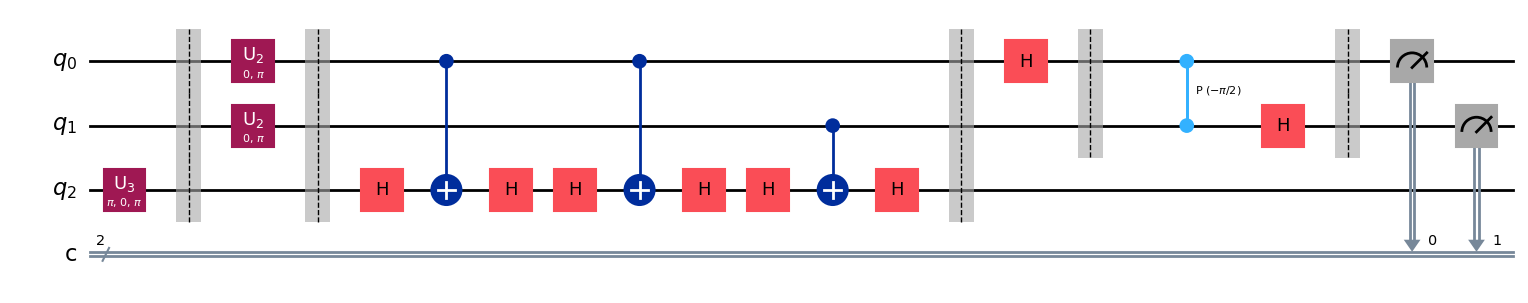

In [25]:
# Construct a circuit in qiskit for the 3 qubit (q) and 2 classical (c) registers.
q = QuantumRegister(3, name='q')
c = ClassicalRegister(2, name='c')
qpe = QuantumCircuit(q, c)

# Initialize your qubit[2] in a state |1> by applyin an X gate.
qpe.x(q[2])
qpe.barrier()

# Apply Hadamard gates to the ancilla qubits
qpe.h(q[0])
qpe.h(q[1])

qpe.barrier()

qpe.append(cu(2),[0,2])
qpe.append(cu(1),[1,2])
qpe.barrier()

qpe.append(qft_dagger_wo_swap(2),[0,1])
qpe.measure(q[0], c[0])
qpe.measure(q[1], c[1])
qpe.decompose().draw('mpl')
# qpe.draw('mpl')

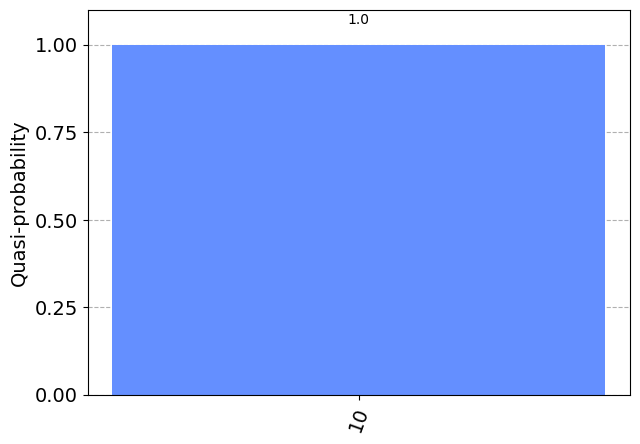

In [26]:
job = sampler.run(qpe, shots=1024)
results = job.result()
plot_histogram(results.quasi_dists[0].binary_probabilities())

We indeed see a peak at the binary representation of $0.5 = 1 \cdot 2^{-1} + 0 \cdot 2^{-2} = (10)$.